# MidTerm

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset and performing train test split

In [8]:
file = 'C:/Users/Asus/Downloads/Data Midterm.csv'
data = pd.read_csv(file)
X = data.drop('Sample code number', axis=1)
X = X.drop('Class', axis=1)
X = X.values
Y = data['Class']
Y = Y.apply(lambda x:1 if x == 4 else 0)
Y = Y.values

# one hot encode Y values


display(X, Y)


array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [9]:
# split the dataset btw train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# 1) Logistic Regression

In [10]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
# train the model (logistic regression)
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

In [16]:
# predict the results of the model
y_pred = log_reg_model.predict(X_test)

In [17]:
# Show confustion matrix
from sklearn.metrics import confusion_matrix

conf_matr = confusion_matrix(y_test, y_pred)
print(conf_matr)

[[79  4]
 [ 2 52]]


In [18]:
# Show accuracy
from sklearn.metrics import accuracy_score

log_accuracy = accuracy_score(y_test, y_pred)
print(log_accuracy)

0.9562043795620438


# 2) KNN

Text(0, 0.5, 'Error Rate')

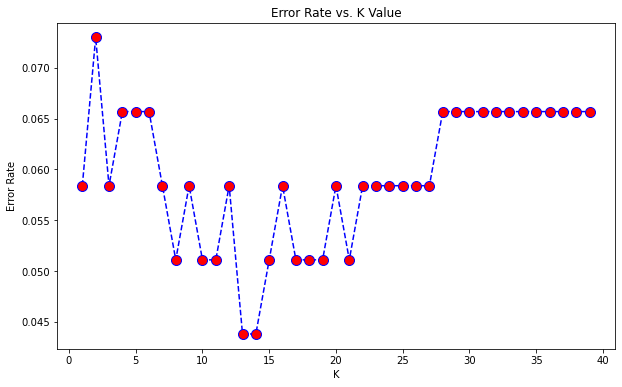

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# finding optimal k value
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [56]:
# train the model (KNN)

# from above graph we take k = 14
knn_model = KNeighborsClassifier(n_neighbors=14)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [57]:
# predict the results of the model
y_pred = knn_model.predict(X_test)

In [58]:
conf_matr_knn = confusion_matrix(y_test, y_pred)
print(conf_matr_knn)

[[79  4]
 [ 2 52]]


In [59]:
knn_accuracy = accuracy_score(y_test, y_pred)
print(knn_accuracy)

0.9562043795620438


# 3) Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
# predict the results of the model
y_pred = rf_model.predict(X_test)

In [30]:
# Show confustion matrix
conf_matr_rf = confusion_matrix(y_test, y_pred)
print(conf_matr_rf)

[[79  4]
 [ 0 54]]


In [31]:
random_forest_accuracy = accuracy_score(y_test, y_pred)
print(random_forest_accuracy)

0.9708029197080292


# 4) Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
# predict the results of the model
y_pred_dt = dt_model.predict(X_test)

In [34]:
conf_matr_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matr_dt)

[[78  5]
 [ 7 47]]


In [70]:
# Show accuracy

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(dt_accuracy)

0.9524087591240876


# 5) SVM Kernel

In [36]:
from sklearn.svm import SVC
svm_kernel_model = SVC(kernel='rbf',random_state=0)
svm_kernel_model.fit(X_train, y_train)

SVC(random_state=0)

In [37]:
# predict results from the model
pred_rbf = svm_kernel_model.predict(X_test)

In [38]:
# show confusion matrix
conf_matr_svm_kern = confusion_matrix(y_test, pred_rbf)
print(conf_matr_svm_kern)

[[79  4]
 [ 3 51]]


In [39]:
# show accuracy

svm_kern_accuracy = accuracy_score(y_test, pred_rbf)
print(svm_kern_accuracy)

0.948905109489051


# 6) XGBOOST

In [60]:
import xgboost as xgb
# Init classifier
xgb_model = xgb.XGBClassifier()

# Fit
xgb_model.fit(X_train, y_train)

# Predict
preds = xgb_model.predict(X_test)

In [61]:
# show confusion matrix
conf_matr_xg = confusion_matrix(y_test, preds)
print(conf_matr_xg)


[[77  6]
 [ 6 48]]


In [63]:
# show accuracy
xg_accuracy = accuracy_score(y_test, preds)
print(xg_accuracy)

0.9524087591240876


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
grid_cv.fit(X_train, y_train)
print(grid_cv.best_score_)


0.9922200952848518


# 7) SVM

In [44]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear',random_state=0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [45]:
# prediction of results
pred_svm = svm_model.predict(X_test)

In [46]:
# show confusion matrix

conf_matr_svm = confusion_matrix(y_test, pred_svm)
print(conf_matr_svm)

[[79  4]
 [ 1 53]]


In [47]:
# Show accuracy

svm_accuracy = accuracy_score(y_test, pred_svm)
print(svm_accuracy)

0.9635036496350365


In [72]:
# Display the results
res_list = {'Name':['Logistic Regression', 'SVM Linear', 'SVM Kernel', 'Random Forest', 'Decision Tree', 'XGBoost', 'KNN', 'GridSearch XGBoost'], 
'Accuracy':[log_accuracy, svm_accuracy, svm_kern_accuracy, random_forest_accuracy, dt_accuracy, xg_accuracy, knn_accuracy, grid_cv.best_score_]}
results = pd.DataFrame.from_dict(res_list)
display(results.sort_values(by='Accuracy', ascending=False))

,Name,Accuracy
7,GridSearch XGBoost,0.992220
3,Random Forest,0.970803
1,SVM Linear,0.963504
0,Logistic Regression,0.956204
6,KNN,0.956204
4,Decision Tree,0.952409
5,XGBoost,0.952409
2,SVM Kernel,0.948905
